In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [291]:
df = pd.read_csv('/Users/rc/workspaces/deep-learning-master/1.gradient-descent/data.csv', header = None)
dfx = np.array(df[[0,1]])    
dfy = np.array(df[2])

In [292]:
# admitted = dfx[np.argwhere(dfy==1)]
# rejected = dfx[np.argwhere(dfy==0)]
# for s in admitted:
#     plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 50, color = 'blue', edgecolor = 'k')
#     plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 50, color = 'red', edgecolor = 'k')

In [293]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(X, w, b):
    dt = np.dot(X, w) + b
    return sigmoid(dt)

def error_formula(y , y_hat):
    return - (y * np.log(y_hat)) - (1-y)* np.log(1 - y_hat)

def update_weights(X, y, w, b, learning_rate):
    error = y - output_formula(X,w,b)
    w += learning_rate * error * X
    b += learning_rate * error
    return w, b

In [322]:


def train(features, targets , b = 1):
    errors = []
    accuracies = []
    slopes = []
    intercepts = []
    n_features = features.shape[1]
    
    #step1 : start with random weights
    #w = np.random.normal(loc = 0, scale= 1.0, size=n_features)
    w = np.random.normal(scale= 0.1, size=n_features)
    
    for e in range(100):
        
        # for everypoint x1,...xn
        for x, y in zip(features, targets):
            y_hat = output_formula(x, w, b)
            
            # calculate error
            error = error_formula(y, y_hat)
            
            # and update weights & bias
            w, b = update_weights(x, y, w, b, 0.1)
        
        # we got new weights and bias for epoch
        y_hat = output_formula(features, w , b)
        loss = np.mean(error_formula(targets , y_hat))
        predictions = y_hat > 0.6
        accuracy = np.mean(predictions == targets)
        accuracies.append(accuracy)
        errors.append(loss)
        slope = -(w[0]/w[1])
        slopes.append(slope)      
        intercept = -(b/w[1])
        intercepts.append(intercept)
        mi = min(slopes, intercepts)[0]
        ma = max(slopes, intercepts)[0]
        r = np.arange(-10, 10, 0.1)
        line = (slope*r) + intercept
        
        plt.title("Solution boundary")
        plt.xlim(-0.05,1.05)
        plt.ylim(-0.05,1.05)
        plt.plot(r, line, 'g--')
    
    #plt.show()
    plt.plot(r, line, 'black')
    admitted = dfx[np.argwhere(dfy==1)]
    rejected = dfx[np.argwhere(dfy==0)]    
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 50, color = 'red', edgecolor = 'k')
    
    plt.show()
    plt.title("error, accuracy")
    plt.plot(errors, label = 'error')
    plt.plot(accuracies, label = 'accuracy')
    plt.legend()
    plt.show()
    

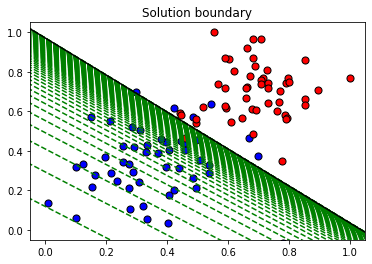

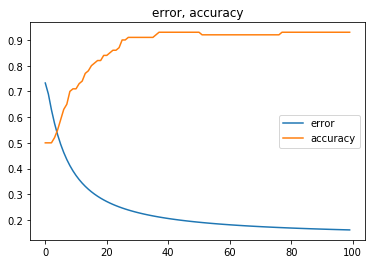

In [323]:
train(dfx,dfy)

In [ ]:
plt.plot(errors)